In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

%config InlineBackend.figure_format = 'retina'

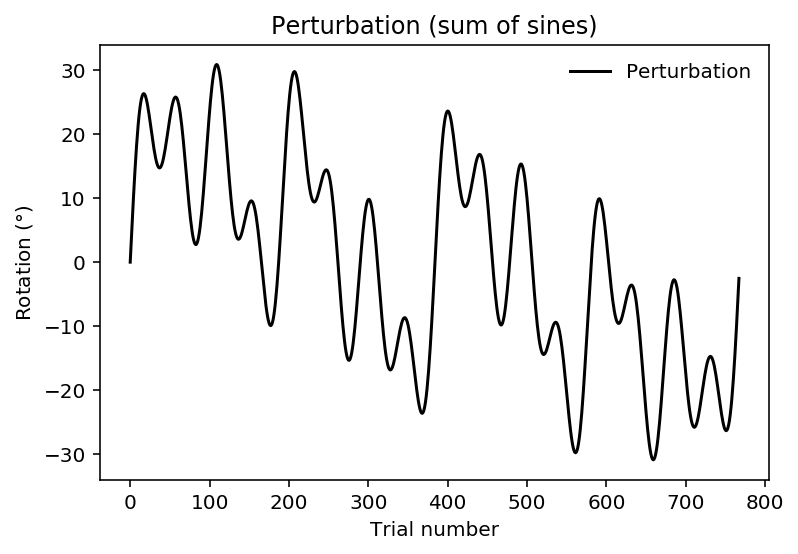

In [39]:
# let's create the perturbation, which is a sum of 5 different sine waves
k = np.array([1, 2, 4, 8, 16])
N = 768
n = np.linspace(0, N-1, N)
sine_in = np.zeros((len(k), N))
shifted_sinewave = np.zeros((len(k), N))

for i in range(len(k)):
    sine_in[i, :] = 10 * np.sin(2 * np.pi * k[i] * n / N)

# perturbation is sum of sines
perturbation = sine_in.sum(axis=0)

# we're going to regress the behavior onto sinusoids of every frequency up to N/2:
# create design matrix X
freqs = np.linspace(0, N/2-1, N//2)
perturbed_freqs = np.array([1, 2, 4, 8, 16])
X = np.zeros((N, len(freqs)))

# create separate strategy and implicit learning functions
strat = np.zeros((N, len(freqs)))
impl = np.zeros((N, len(freqs)))
A_strat = np.zeros(N) 
A_impl = np.zeros(N) 
# A_strat[1:128] = np.linspace(1, 0, 127) 
# A_impl[1:128] = np.linspace(1, 0, 127)
A_strat[perturbed_freqs] = np.array([3.2, 4, 4.2, 5, 5.5])
A_impl[perturbed_freqs] = np.array([6.5, 5.5, 5.2, 4.3, 4.2])

for i in range(len(freqs)):
    X[:, i] = np.sin(2 * np.pi * freqs[i] * n / N)
    strat[:, i] = A_strat[i] * np.sin(2 * np.pi * freqs[i] * n / N)
    impl[:, i] = A_impl[i] * np.sin(2 * np.pi * freqs[i] * n / N)

# total learning is sum of explicit and implicit
combined_learning = strat.sum(axis=1) + impl.sum(axis=1)

# solve for optimal Beta
U, s, Vh = np.linalg.svd(X)
S_pound = linalg.diagsvd(1/s, X.shape[1], X.shape[0]) # must be same shape as S^T
Beta = Vh.T @ S_pound @ U.T @ combined_learning
Beta_strat = Vh.T @ S_pound @ U.T @ strat.sum(axis=1)
Beta_impl = Vh.T @ S_pound @ U.T @ impl.sum(axis=1)
Beta_pert = Vh.T @ S_pound @ U.T @ perturbation

# plot the perturbation
plt.plot(perturbation, c='k', label='Perturbation')
plt.xlabel('Trial number')
plt.ylabel('Rotation ($\degree$)')
plt.title('Perturbation (sum of sines)')
plt.legend(frameon=False);


In [12]:
np.linspace(2, 0.2, 10)
A_strat[-20:]

array([0.24464752, 0.24229765, 0.23994778, 0.23759791, 0.23524804,
       0.23289817, 0.2305483 , 0.22819843, 0.22584856, 0.22349869,
       0.22114883, 0.21879896, 0.21644909, 0.21409922, 0.21174935,
       0.20939948, 0.20704961, 0.20469974, 0.20234987, 0.2       ])

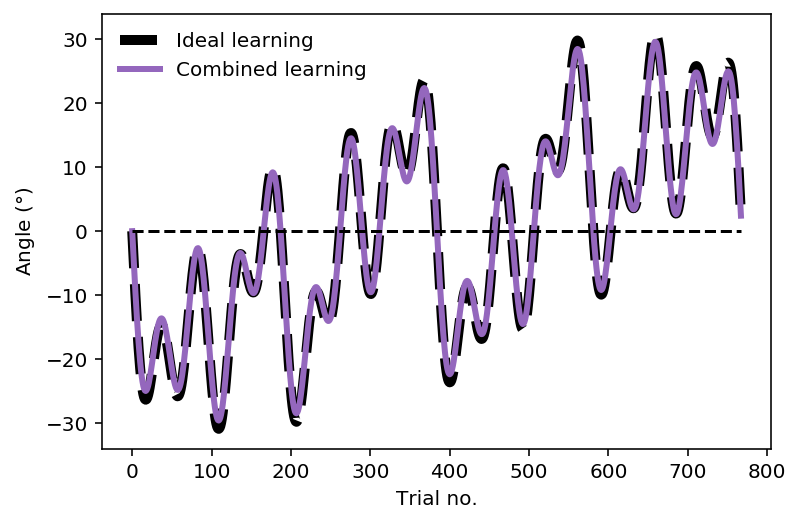

In [40]:
# plot learning
plt.plot(-perturbation, c='k', linestyle='--', linewidth=5, label='Ideal learning')
plt.plot(-combined_learning, c='tab:purple', linewidth=3, label='Combined learning')
plt.plot([0] * N, linestyle='--', c='k')
plt.xlabel('Trial no.')
plt.ylabel('Angle ($\degree$)')
plt.legend(frameon=False)

Text(0, 0.5, 'Amplitude')

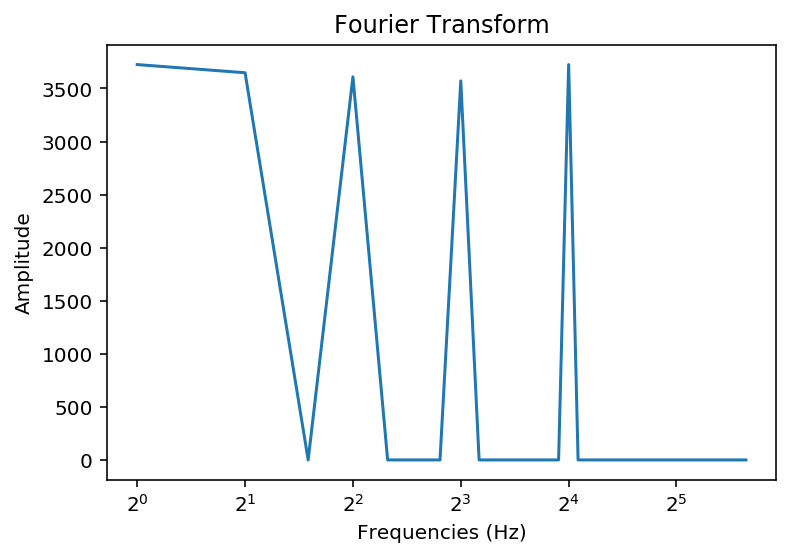

In [41]:
# compare regression results to FFT
combined_FT = np.fft.fft(combined_learning)
plt.plot(freqs[1:51], np.abs(combined_FT[1:51]))
plt.title('Fourier Transform')
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')

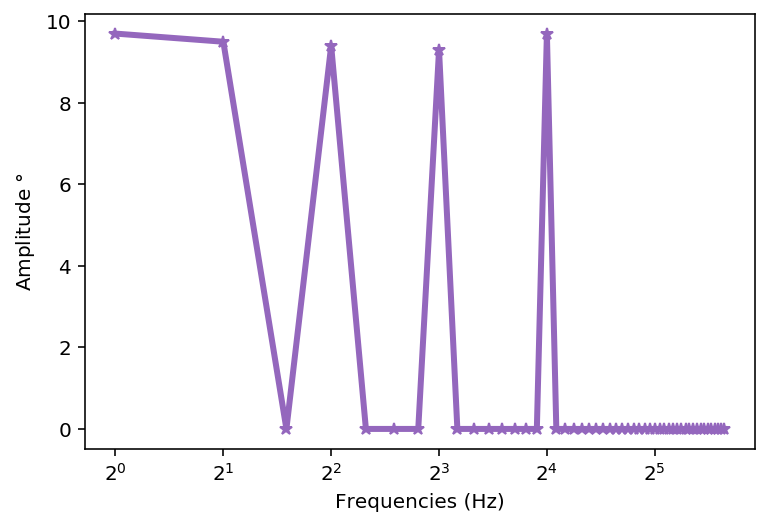

In [42]:
# let's plot amplitudes of perturbed frequencies
plt.plot(freqs[1:51], Beta[1:51], c='tab:purple', linewidth=3, marker='*')
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude $\degree$');

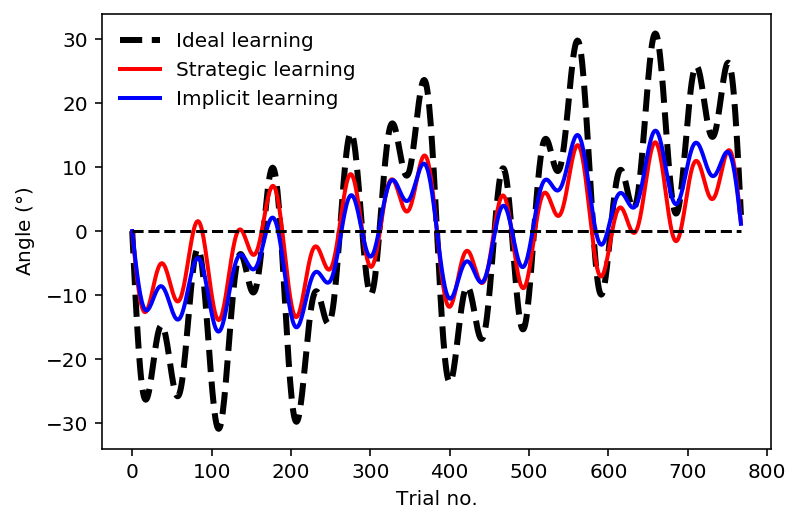

In [43]:
# plot strategy and implicit
plt.plot(-perturbation, c='k', linestyle='--', linewidth=3, label='Ideal learning')
plt.plot(-strat.sum(axis=1), linewidth=2, c='r', label='Strategic learning')
plt.plot(-impl.sum(axis=1), linewidth=2, c='b', label='Implicit learning')
plt.plot([0] * N, linestyle='--', c='k')
plt.xlabel('Trial no.')
plt.ylabel('Angle ($\degree$)')
plt.legend(frameon=False)

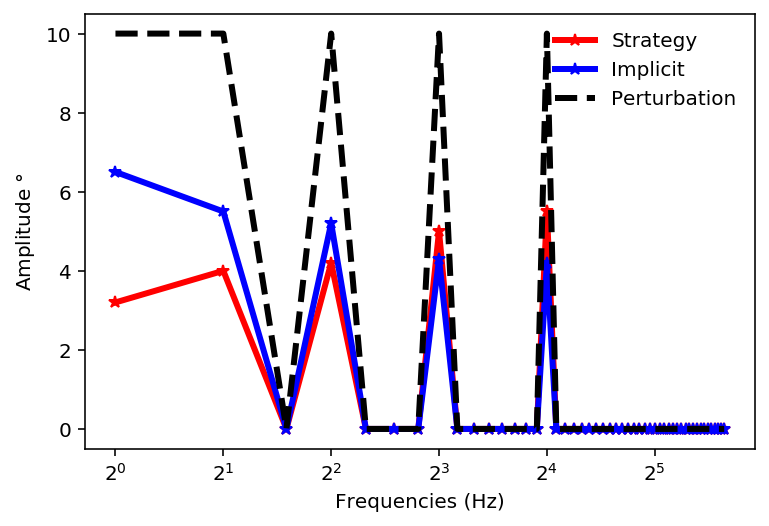

In [44]:
# let's plot amplitudes of perturbed frequencies
plt.plot(freqs[1:51], Beta_strat[1:51], c='r', linewidth=3, marker='*', label='Strategy')
plt.plot(freqs[1:51], Beta_impl[1:51], c='b', linewidth=3, marker='*', label='Implicit')
plt.plot(freqs[1:51], Beta_pert[1:51], c='k', linewidth=3, linestyle='--', label='Perturbation')
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude $\degree$')
plt.legend(frameon=False)

In [ ]:
# How to plot combined perturbation-free response for frequencies 1-16?
# 1) Use Beta values for corresponding frequencies to generate sinusoids 
# (e.g., for strategy, use Beta_strat values)
# 2) Sum the appropriate sinusoids up for strategy and implicit
# 3) Sum those sinusoids for combined, or use Betas from combined learning

In [51]:
0.02 * .94 + .8 * .01 + .9 * .05

0.0718

In [54]:
print((.94 * .02) / .0718)
print((.8 * .01) / .0718)
print((.9 * .05) / .0718)

0.2618384401114206
0.11142061281337047
0.626740947075209


In [50]:
1/32

0.03125